<a href="https://colab.research.google.com/github/Dyun24/MIT504_Austria/blob/main/Time_Series_ARIMA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time Series Analysis with ARIMA Model

# 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# 2. Load Data Set

In [3]:
G = pd.read_csv('shampoo_sales.csv')
G.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


# 3. Convert Month to Datetime

In [7]:
G['Month'] = pd.date_range(start='2000-01-01',periods=len(G), freq='M')
G.set_index('Month', inplace=True)

# 4. Plot the Time Series

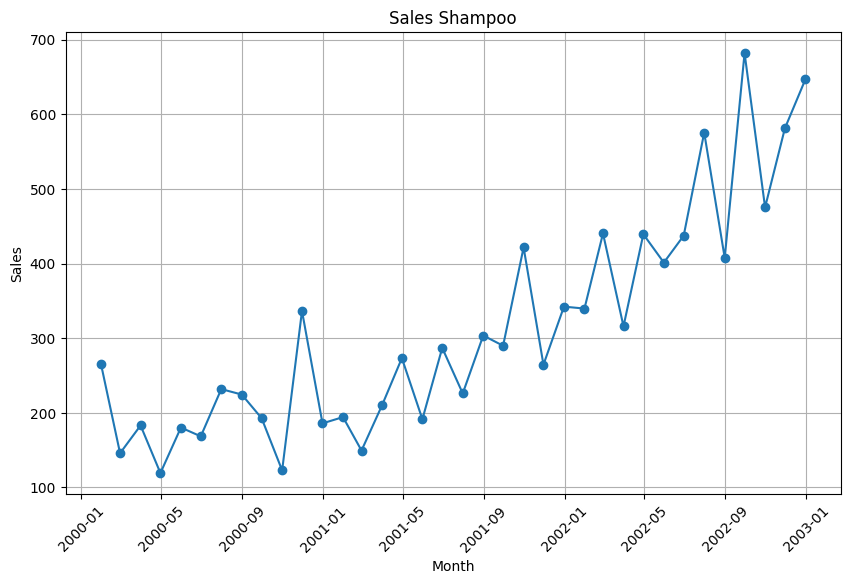

In [10]:
plt.figure(figsize=(10,6))
plt.plot(G.index, G['Sales'], marker='o', linestyle='-')
plt.title('Sales Shampoo')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 5. Decomposotion

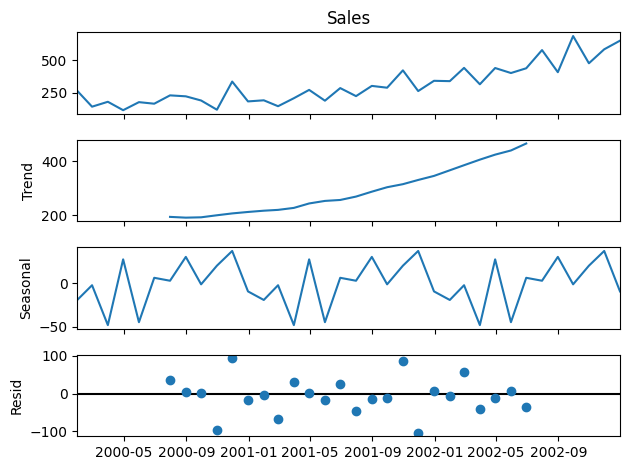

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(G['Sales'], model='additive', period=12)

fig = decomposition.plot()
plt.show()

# 6. Fit an ARIMA Model

In [13]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(G['Sales'], order=(5,1,0))
results = model.fit()

print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Sat, 06 Jul 2024   AIC                            408.969
Time:                        02:18:18   BIC                            418.301
Sample:                    01-31-2000   HQIC                           412.191
                         - 12-31-2002                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

# 7. Forecasting Future Values

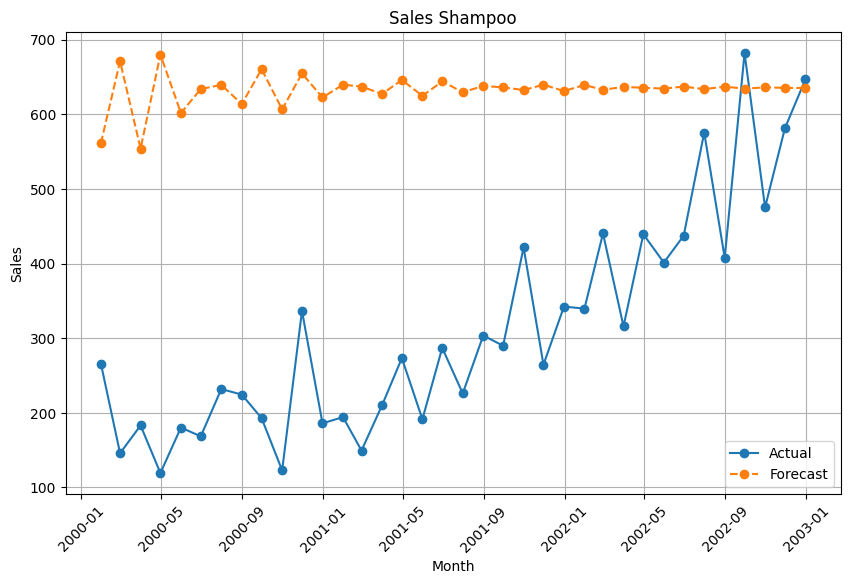

In [23]:
forecast = results.forecast(steps=36)

plt.figure(figsize=(10,6))
plt.plot(G.index, G['Sales'], marker='o', linestyle='-', label='Actual')
plt.plot(G.index[-len(forecast):], forecast, marker='o', linestyle='--', label='Forecast')
plt.title('Sales Shampoo')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

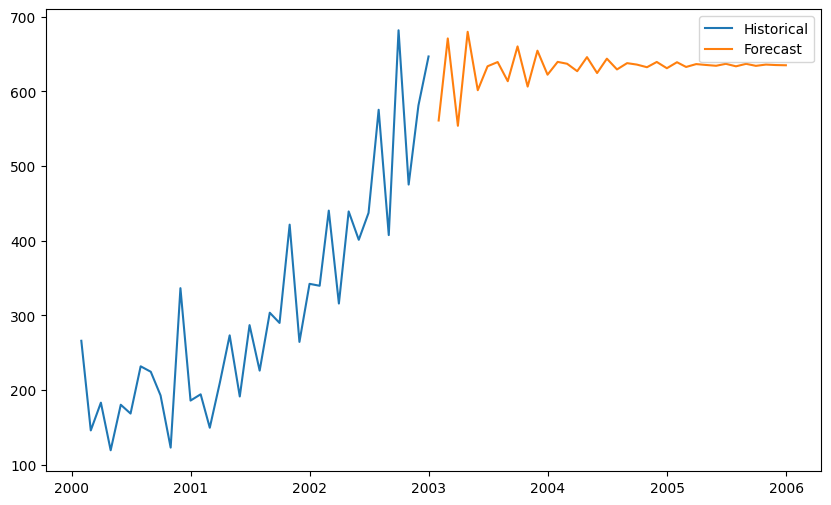

In [22]:
forecast = results.forecast(steps=36)

plt.figure(figsize=(10, 6))
plt.plot(G.index,G['Sales'], label='Historical')
plt.plot(forecast.index, forecast, label='Forecast')
plt.legend()
plt.show()